## Chapter 4 Training Models

In [1]:
import numpy as np

In [2]:
X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.rand(100, 1)

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

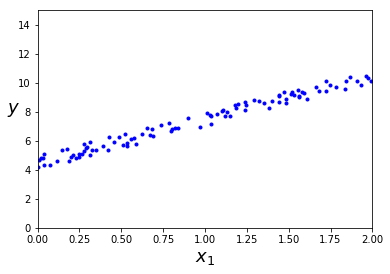

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best

array([[4.49988412],
       [3.02254153]])

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.49988412],
       [10.54496717]])

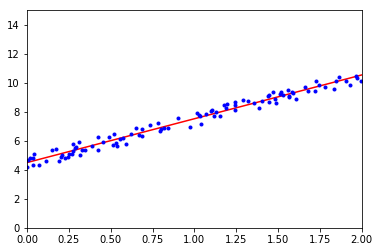

In [9]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [10]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.rand(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

In [11]:
theta

array([[4.49988412],
       [3.02254153]])

In [19]:
# m = len(X_b)
m = 50
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [20]:
theta

array([[4.44982976],
       [3.03461804]])

In [21]:
learning_schedule(0)

0.1

In [22]:
learning_schedule(50)

0.05

In [26]:
import tensorflow as tf

In [27]:
A = tf.placeholder(tf.float32, shape=(None, 3))
B = A + 5

In [28]:
with tf.Session() as sess:
    B_val_1 = B.eval(feed_dict = {A:[[1, 2, 3]]})
    B_val_2 = B.eval(feed_dict = {A:[[4, 5, 6], [7, 8, 9]]})

In [29]:
print(B_val_1)
print(B_val_2)

[[6. 7. 8.]]
[[ 9. 10. 11.]
 [12. 13. 14.]]


In [30]:
X = tf.placeholder(tf.float32, shape=(None, n+1), name='X')
y = tf.placeholder(tf.float32, shape=(None, 1), name='y')

NameError: name 'n' is not defined